In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv('data/Calidad_del_Aire_Municipio_de_Duitama_20240627.csv')

# Reemplazar valores de 0 en 'Humedad Relativa' y 'Temperatura' por NaN
df['Humedad Relativa'].replace(0, pd.NA, inplace=True)
df['Temperatura'].replace(0, pd.NA, inplace=True)

# Interpolación para rellenar los NaN resultantes
df['Humedad Relativa'] = df['Humedad Relativa'].interpolate()
df['Temperatura'] = df['Temperatura'].interpolate()

# Verificar datos después de la interpolación
print(df[['Humedad Relativa', 'Temperatura']].isna().sum())
filter_nan = df['Humedad Relativa'].isna() & df['Temperatura'].isna()
data_nan = df[filter_nan]
print('Registros con Humedad Relativa y Temperatura NAN',len(data_nan))

# Proporción de registros con 'Humedad Relativa' y 'Temperatura' igual a 0 respecto al total
proporcion_igual_cero = (len(data_nan)/ len(df)) * 100
print(f"Proporción de registros con Humedad Relativa y Temperatura NAN: {proporcion_igual_cero:.2f}%")
df_clean_ht = df[~filter_nan]
df_clean = df_clean_ht.dropna(subset=['Temperatura'])

# Verificar la estructura de los datos
print(df_clean.info())
print(df_clean.describe())
print(df_clean)

Humedad Relativa    4138
Temperatura         4139
dtype: int64
Registros con Humedad Relativa y Temperatura NAN 4138
Proporción de registros con Humedad Relativa y Temperatura NAN: 13.62%
<class 'pandas.core.frame.DataFrame'>
Index: 26243 entries, 1 to 30381
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fecha             26243 non-null  object 
 1   Nombre Equipo     26243 non-null  object 
 2   co                26243 non-null  float64
 3   co2               26243 non-null  float64
 4   pm10              26243 non-null  float64
 5   pm2_5             26243 non-null  float64
 6   pm5               26243 non-null  float64
 7   Humedad Relativa  26243 non-null  object 
 8   Temperatura       26243 non-null  object 
dtypes: float64(5), object(4)
memory usage: 2.0+ MB
None
                 co           co2          pm10         pm2_5           pm5
count  26243.000000  26243.000000  26243.000000  26243.0000

C:\Users\yassc\AppData\Local\Temp\ipykernel_9256\2723721050.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Humedad Relativa'].replace(0, pd.NA, inplace=True)
C:\Users\yassc\AppData\Local\Temp\ipykernel_9256\2723721050.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

<Figure size 1400x800 with 0 Axes>

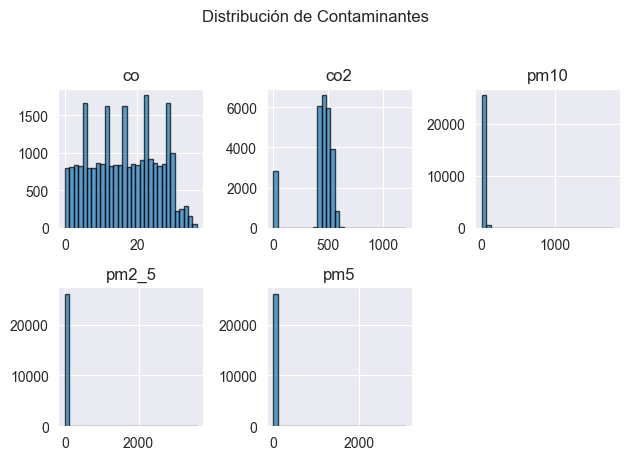

In [3]:
# Histogramas de contaminantes
plt.figure(figsize=(14, 8))
df_clean[['co', 'co2', 'pm10', 'pm2_5', 'pm5']].hist(bins=30, edgecolor='black', alpha=0.7, layout=(2, 3))
plt.suptitle('Distribución de Contaminantes')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [5]:
# Tendencias temporales de PM2.5
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_clean, x='Fecha', y='pm2_5', hue='Nombre Equipo')
plt.title('Tendencia de PM2.5 en el Tiempo')
plt.xticks(rotation=45)
plt.show()

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(14, 8))
correlation_matrix = df_clean[['co', 'co2', 'pm10', 'pm2_5', 'pm5', 'Humedad Relativa', 'Temperatura']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones')
plt.show()